In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow_federated as tff
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from time import sleep 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib

2024-01-17 13:15:03.204032: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-17 13:15:03.744988: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-17 13:15:03.745018: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-17 13:15:03.748068: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-17 13:15:04.045915: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-17 13:15:04.049074: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [14]:
df = pd.read_csv('dataset/P01/ZEPHYR/2021_12_03-16_44_37_Summary.csv')

In [3]:
df.shape

(2944, 36)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              2944 non-null   object 
 1   HR                2944 non-null   int64  
 2   BR                2944 non-null   float64
 3   SkinTemp          2944 non-null   float64
 4   Posture           2944 non-null   int64  
 5   Activity          2944 non-null   float64
 6   PeakAccel         2944 non-null   float64
 7   BatteryVolts      2944 non-null   float64
 8   BatteryLevel      2944 non-null   int64  
 9   BRAmplitude       2944 non-null   float64
 10  BRNoise           2944 non-null   float64
 11  BRConfidence      2944 non-null   int64  
 12  ECGAmplitude      2944 non-null   float64
 13  ECGNoise          2944 non-null   float64
 14  HRConfidence      2944 non-null   int64  
 15  HRV               2944 non-null   int64  
 16  SystemConfidence  2944 non-null   int64  


In [6]:
df.head()

,Time,HR,BR,SkinTemp,Posture,Activity,PeakAccel,BatteryVolts,BatteryLevel,BRAmplitude,...,DeviceTemp,StatusInfo,LinkQuality,RSSI,TxPower,CoreTemp,AuxADC1,AuxADC2,AuxADC3,Ext.Status
0,03/12/2021 16:44:37.445,65,10.0,-3276.8,-1,0.66,1.73,4.174,95,0.0,...,24.9,688,255,-128,-128,6553.5,416,420,499,49152
1,03/12/2021 16:44:38.445,65,10.0,-3276.8,45,0.80,1.14,4.174,95,0.0,...,24.9,688,255,-128,-128,6553.5,415,422,500,32768
2,03/12/2021 16:44:39.445,65,10.0,-3276.8,68,0.52,0.73,4.174,95,0.0,...,24.9,688,255,-128,-128,6553.5,415,421,500,32768
3,03/12/2021 16:44:40.445,65,10.0,-3276.8,75,0.35,0.86,4.174,95,0.0,...,24.9,688,255,-128,-128,6553.5,415,421,499,32768
4,03/12/2021 16:44:41.445,67,10.0,-3276.8,91,0.57,1.37,4.174,95,0.0,...,24.9,688,255,-128,-128,6553.5,415,421,500,32768


/tmp/ipykernel_918/563469902.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


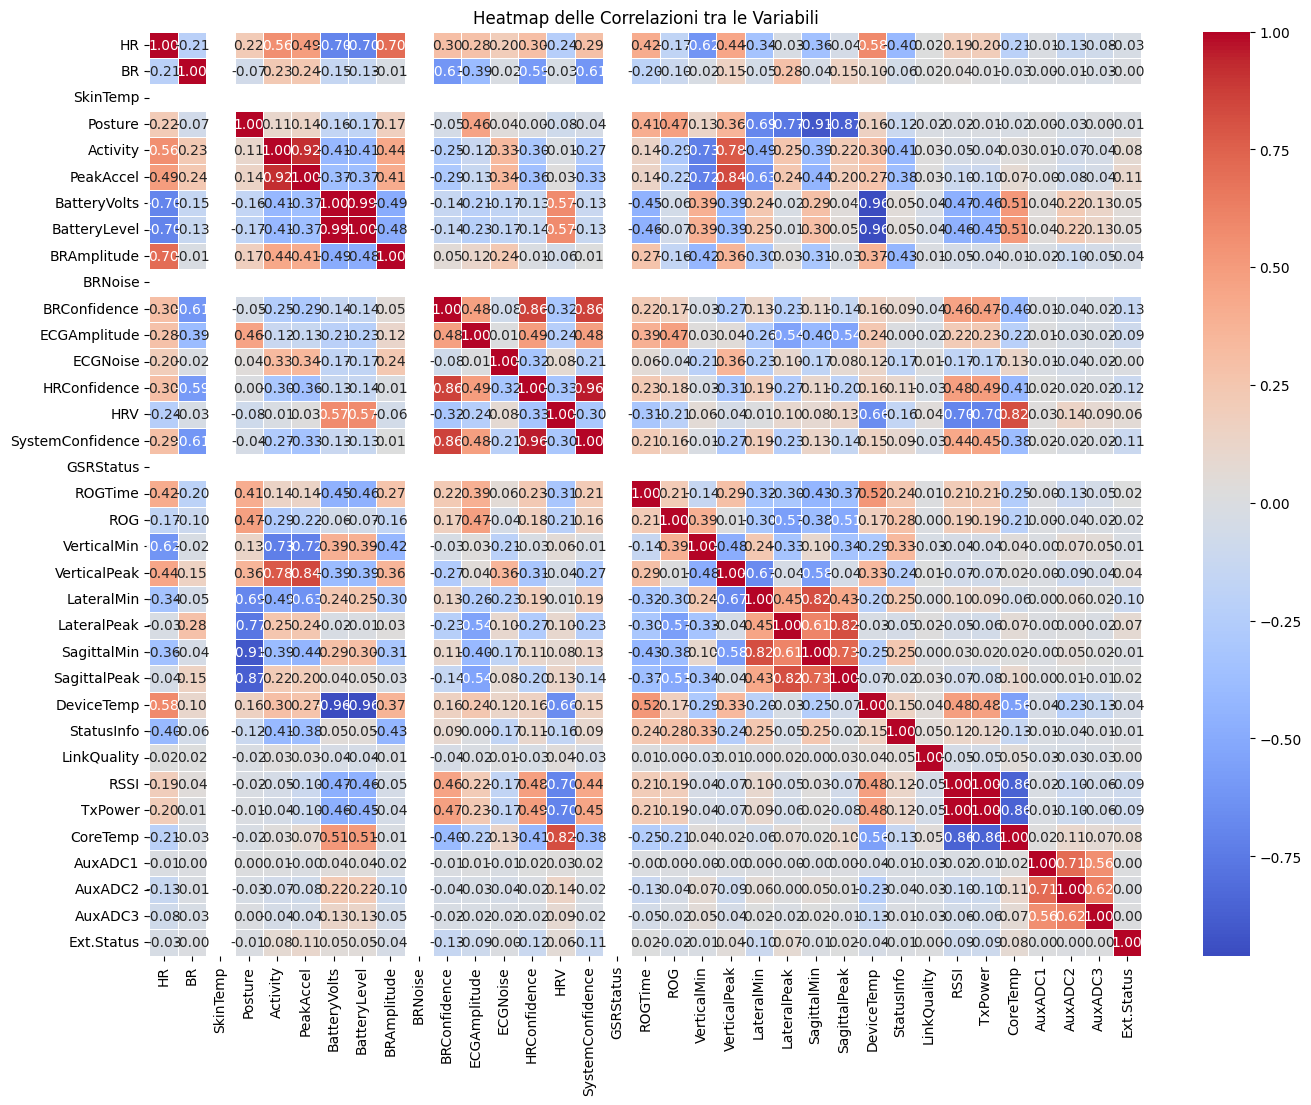

In [7]:
# Calcola la matrice delle correlazioni
correlation_matrix = df.corr()

# Crea una heatmap utilizzando seaborn
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap delle Correlazioni tra le Variabili')
plt.show()

In [52]:
df = df.drop(['SkinTemp', 'Time', 'Ext.Status', 'AuxADC1', 'LinkQuality', 'GSRStatus'], axis=1)

In [ ]:
df = df.drop

In [2]:
lista_path = []
path = r"dataset/"
for nome_cartella in os.listdir(path):
    if "P" in nome_cartella:
        path_fine = path+nome_cartella+"/ZEPHYR/"
        for file in os.listdir(path_fine):
            # print(file)
            if "Summary.csv" in file and ":Zone.Identifier" not in file:
                lista_path.append(path_fine+file)

                # shutil.copyfile(path_fine+file, "/home/stecno/Desktop/diciasette/"+file)

print(lista_path)

# dataset/P04/ZEPHYR/2021_11_26-18_00_34_Summary.csv
# dataset/P05/ZEPHYR/2021_11_29-09_15_19_Summary.csv

['dataset/P10/ZEPHYR/2021_11_30-11_13_34_Summary.csv', 'dataset/P02/ZEPHYR/2021_11_25-16_51_54_Summary.csv', 'dataset/P07/ZEPHYR/2021_11_29-15_19_07_Summary.csv', 'dataset/P06/ZEPHYR/2021_11_29-10_23_54_Summary.csv', 'dataset/P03/ZEPHYR/2021_11_26-16_07_33_Summary.csv', 'dataset/P14/ZEPHYR/2021_12_01-15_03_55_Summary.csv', 'dataset/P12/ZEPHYR/2021_12_03-10_24_41_Summary.csv', 'dataset/P13/ZEPHYR/2021_11_30-18_16_40_Summary.csv', 'dataset/P05/ZEPHYR/2021_11_29-09_15_19_Summary.csv', 'dataset/P16/ZEPHYR/2021_12_01-18_07_37_Summary.csv', 'dataset/P08/ZEPHYR/2021_11_29-17_46_23_Summary.csv', 'dataset/P09/ZEPHYR/2021_11_30-09_06_33_Summary.csv', 'dataset/P04/ZEPHYR/2021_11_26-18_00_34_Summary.csv', 'dataset/P15/ZEPHYR/2021_12_01-10_46_41_Summary.csv', 'dataset/P17/ZEPHYR/2021_12_02-16_28_52_Summary.csv', 'dataset/P01/ZEPHYR/2021_12_03-16_44_37_Summary.csv', 'dataset/P11/ZEPHYR/2021_11_30-14_36_55_Summary.csv']


In [3]:
test = lista_path[1]
lista_path = lista_path[1:]

# Ora lista_path contiene tutti gli elementi tranne l'ultimo, e 'test' contiene l'ultimo elemento
print("Lista senza l'ultimo elemento:", lista_path)
print("Ultimo elemento (test):", test)

Lista senza l'ultimo elemento: ['dataset/P02/ZEPHYR/2021_11_25-16_51_54_Summary.csv', 'dataset/P07/ZEPHYR/2021_11_29-15_19_07_Summary.csv', 'dataset/P06/ZEPHYR/2021_11_29-10_23_54_Summary.csv', 'dataset/P03/ZEPHYR/2021_11_26-16_07_33_Summary.csv', 'dataset/P14/ZEPHYR/2021_12_01-15_03_55_Summary.csv', 'dataset/P12/ZEPHYR/2021_12_03-10_24_41_Summary.csv', 'dataset/P13/ZEPHYR/2021_11_30-18_16_40_Summary.csv', 'dataset/P05/ZEPHYR/2021_11_29-09_15_19_Summary.csv', 'dataset/P16/ZEPHYR/2021_12_01-18_07_37_Summary.csv', 'dataset/P08/ZEPHYR/2021_11_29-17_46_23_Summary.csv', 'dataset/P09/ZEPHYR/2021_11_30-09_06_33_Summary.csv', 'dataset/P04/ZEPHYR/2021_11_26-18_00_34_Summary.csv', 'dataset/P15/ZEPHYR/2021_12_01-10_46_41_Summary.csv', 'dataset/P17/ZEPHYR/2021_12_02-16_28_52_Summary.csv', 'dataset/P01/ZEPHYR/2021_12_03-16_44_37_Summary.csv', 'dataset/P11/ZEPHYR/2021_11_30-14_36_55_Summary.csv']
Ultimo elemento (test): dataset/P02/ZEPHYR/2021_11_25-16_51_54_Summary.csv


In [4]:
scaler = StandardScaler()

# Function to preprocess the new dataset
def preprocess_dataset(dataset_path, fitto_scaler=False):
    df = pd.read_csv(dataset_path)

    # Elimina la colonna della data e dell'ora
    df = df.drop(['SkinTemp', 'Time', 'Ext.Status', 'AuxADC1', 'LinkQuality', 'GSRStatus'], axis=1)

    # Seleziona le colonne di input (features) e di output (target)
    y_train = df['HR']
    X_train = df.drop(['HR'], axis=1)  # Sostituisci 'HR' con il nome della tua variabile target

    # Suddividi il dataset in set di addestramento e test
    if fitto_scaler == False:
    # Normalizza i dati
      X_train = scaler.transform(X_train)
    else:
      X_train = scaler.fit_transform(X_train)

    return X_train, y_train

_, _ = preprocess_dataset("dataset/P02/ZEPHYR/2021_11_25-16_51_54_Summary.csv", fitto_scaler = True)


In [13]:
# Process each dataset and store the results in a list
processed_data = [preprocess_dataset(file) for file in lista_path]

def convert_to_federated_format(data):
    dataset = tf.data.Dataset.from_tensor_slices((data[0], data[1]))
    dataset = dataset.shuffle(buffer_size=len(data[0]))
    dataset = dataset.batch(100)  # Adjusted batch size
    dataset = dataset.repeat(30) # epoche

    return dataset


# Create a list of federated datasets
federated_data = [convert_to_federated_format(data) for data in processed_data]

# Example: Print the first federated dataset
print(federated_data[0])

def model_fn():
    model = Sequential()
    model.add(Dense(32, activation='relu',  input_shape=(29,)))  
    # model.add(Dropout(0.4))
    model.add(Dense(16, activation='relu'))
    # model.add(Dropout(0.4))
    model.add(Dense(1, activation='linear'))

    return tff.learning.models.from_keras_model(
        model,
        input_spec=federated_data[0].element_spec,
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.MeanAbsoluteError()]
    )

trainer = tff.learning.algorithms.build_weighted_fed_avg(
  model_fn,
  client_optimizer_fn=lambda: tf.keras.optimizers.SGD(0.01))  # Adjusted learning rate

state = trainer.initialize()
for iter in range(len(federated_data)):
  federated_dat = [federated_data[iter]]
  result = trainer.next(state, federated_dat)
  state = result.state
  metrics = result.metrics
  print(f"{iter}  prova  {metrics}")
  print("loss: ", metrics['client_work']['train']['loss'])

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(state, 'state.pkl')

<_RepeatDataset element_spec=(TensorSpec(shape=(None, 29), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


2024-01-17 14:37:55.454680: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-01-17 14:37:55.454988: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-01-17 14:37:55.475811: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-01-17 14:37:55.476072: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-01-17 14:37:55.731874: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-01-17 14:37:55.732132: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-01-17 14:37:55.843502: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-01-17 14:37:55.843774: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session


0  prova  OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_error', nan), ('loss', nan), ('num_examples', 128850), ('num_batches', 1290)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 1)]))])
loss:  nan
1  prova  OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_error', nan), ('loss', nan), ('num_examples', 135510), ('num_batches', 1380)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 1)]))])
loss:  nan
2  prova  OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_error', nan), ('loss', nan), ('num_examples', 101970), ('num_batches', 1020)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 1)]))])
los

['state.pkl']

In [14]:
# Load the saved scaler
scaler = joblib.load('scaler.pkl')
state = joblib.load('state.pkl')
# Function to preprocess the new dataset
def preprocess_dataset(dataset_path):
    df = pd.read_csv(dataset_path)


    df = df.drop(['SkinTemp', 'Time', 'Ext.Status', 'AuxADC1', 'LinkQuality', 'GSRStatus'], axis=1)


    # Seleziona le colonne di input (features) e di output (target)
    y_test = df['HR']

    X_test = df.drop(['HR'], axis=1)  # Sostituisci 'HR' con il nome della tua variabile target
    # Normalizza i dati
    X_test = scaler.transform(X_test)

    return X_test, y_test

X_test, y_test = preprocess_dataset(test)
new_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
new_dataset = new_dataset.batch(1)  # Adjust batch size if needed

# Convert the TensorFlow dataset to a federated dataset
federated_test_data = [new_dataset]
# Assuming `state` is the state of your trained model
model_weights = trainer.get_model_weights(state)

# Create an evaluation computation
evaluation = tff.learning.build_federated_evaluation(model_fn)

# Evaluate the model on the new dataset
evaluation_result = evaluation(model_weights, [new_dataset])

# Print the evaluation result
print("Evaluation result on the test dataset:", evaluation_result)


2024-01-17 14:38:35.663793: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-01-17 14:38:35.664124: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
/tmp/ipykernel_198/1243197321.py:31: DeprecationWarning: `tff.learning.build_federated_evaluation` is deprecated, use `tff.learning.algorithms.build_fed_eval` instead.
  evaluation = tff.learning.build_federated_evaluation(model_fn)
2024-01-17 14:38:36.329237: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-01-17 14:38:36.329570: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-01-17 14:38:36.402582: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-01-17 14:38:36.402932: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
2024-01-17 14:38:

Evaluation result on the test dataset: OrderedDict([('eval', OrderedDict([('mean_absolute_error', 25.279533), ('loss', 955.9825), ('num_examples', 4295), ('num_batches', 4295)]))])
